In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
import matplotlib

# Lotka-Volterra equations

In the following we briefly describe the assigment that will be solved in this notebook and that is centered around the following set of differential equations,

$$
\begin{cases}
\dot{x} = \alpha x - \mathcal{p} \cdot x y \\
\dot{y} = \mathcal{p} \cdot x y - c y \\
\end{cases}
$$

The system is known as the Lotka-Volterra equations and describes the dynamics of a predator-prey system. The first equation describes the dynamics of the prey population, while the second equation describes the dynamics of the predator population. The parameter $\alpha$ describes the growth rate of the prey population, while the parameter $c$ describes the death rate of the predator population. The parameter $\mathcal{p}$ describes the interaction between the predator and the prey population.

The tasks we will solve are the following:


1. Find the stationary solutions of the system.

2. Perform a linear stability analysis of the stationary solutions and find out wether we have stable solutions.
3. Simulate the equations of the system with different parameters trying to find a situation where we observe sustained oscillations. 


## Finding the stationary solutions of the system

In order to find the stationary solutions of the system we need to set the derivatives to zero and solve for the unknowns. This gives us the following system of equations,

$$
\begin{cases}
\alpha x^* - \mathcal{p} \cdot x^* y^* = 0 \\
\mathcal{p} \cdot x^* y^* - c y^* = 0 \\
\end{cases}
$$

which can be solved for $x^*$ and $y^*$ to give us the following solutions,

$$
\begin{cases}
x^* = \dfrac{c}{\mathcal{p}} \\
\\
y^* = \dfrac{\alpha}{\mathcal{p}} \\
\end{cases}
$$

and

$$
\begin{cases}
x^* = 0 \\
\\
y^* = 0 \\
\end{cases}
$$

We notice that due to the uniqueness of the solutions, trajectories in the first quadrant (the only we are interest in) will always remain in the first quadrant. 

<br/>


## Linear stability analysis
We proceed now by performing a linear stability analysis of the stationary solutions. Calling the stationary solutions as $x^*$ and $y^*$ and denoting $\tilde{x} = x - x^*$ and $\tilde{y} = y - y^*$ we can write the system of equations as,

<br/>

$$
\left(\begin{array}{c}{\dot{\tilde{x}}} \\ {\dot{\tilde{y}}}\end{array}\right)= J\left(\begin{array}{c}{\tilde{x}} \\ {\tilde{y}}\end{array}\right);
$$

putting in the Jacobian matrix,
<br/>

$$
\left(\begin{array}{c}{\dot{\tilde{x}}} \\ {\dot{\tilde{y}}}\end{array}\right)=\left(\begin{array}{cc}{\partial_x f_1} & {\partial_y f_1} \\ {\partial_x f_2} & {\partial_y f_2}\end{array}\right)\left(\begin{array}{c}{\tilde{x}} \\ {\tilde{y}}\end{array}\right)
$$


where $f_1 = \alpha x - \mathcal{p} \cdot x y$ and $f_2 = \mathcal{p} \cdot x y - c y$. Finally we get,

<br/>


$$
\left(\begin{array}{c}{\dot{\tilde{x}}} \\ {\dot{\tilde{y}}}\end{array}\right)=\left(\begin{array}{cc}{\alpha-\mathcal{p} y^*} & {-\mathcal{p} x^*} \\ {\mathcal{p} y^*} & {px^*-c}\end{array}\right)\left(\begin{array}{c}{\tilde{x}} \\ {\tilde{y}}\end{array}\right)
$$

<br/>

We can now compute the eigenvalues of the Jacobian matrix and determine the stability of the stationary solutions. For the solution $x = 0$, $y = 0$ the Jacobian $J$ is given by,

<br/>

$$
J = \left(\begin{array}{cc}{\alpha} & {0} \\ {0} & {-c}\end{array}\right)
$$

<br/>

The eigenvalues of this matrix are given by the diagonal elements, which are $\alpha$ and $-c$. We can see that the first eigenvalue has a positive real part, while the second eigenvalue has a negative real part. This means that the equilibrium $x = 0$, $y = 0$ is an unstable equilibrium and, being the eigenvalues purely real, we have a saddle.

<br/>

For the solution $x = \dfrac{c}{\mathcal{p}}$, $y = \dfrac{\alpha}{\mathcal{p}}$ the Jacobian $J$ is given by,

<br/>

$$
J = \left(\begin{array}{cc}{0} & {-c} \\ {\alpha } & {0}\end{array}\right)
$$

<br/>

To look for the eigenvalues we compute first the characteristic polynomial of the matrix, finding the determinant of the matrix $A - \lambda \mathbb{I}$,

<br/>

$$
\det(A - \lambda \mathbb{I}) = det \left(\begin{array}{cc}{- \lambda} & {-c} \\ {\alpha } & {- \lambda}\end{array}\right) \quad = \quad 0;
$$

<br/>

$$
\lambda^2 + \alpha c = 0, \quad \lambda = \pm \sqrt{- \alpha c} \quad = \quad \pm i \sqrt{\alpha c}
$$

<br/>

We can see that the eigenvalues are purely imaginary and complex conjugate. This means that the resulting motion is characterized by ellipses in the phase space with no net motion toward the solution or away from the solution.

In [4]:
def system(var, t, a, p, c):
    x, y = var

    # Define the system of equations
    dx_dt = a * x - p * x * y

    
    dy_dt = p * x * y - c * y 

    return [dx_dt, dy_dt]


# time_domain
t = np.linspace(0, 100, 1000)

In [5]:
def return_solution(initial_conditions, t, a, p, c):
    # Solve the system of equations
    solution = odeint(system, initial_conditions, t, args=(a, p, c))
    return solution

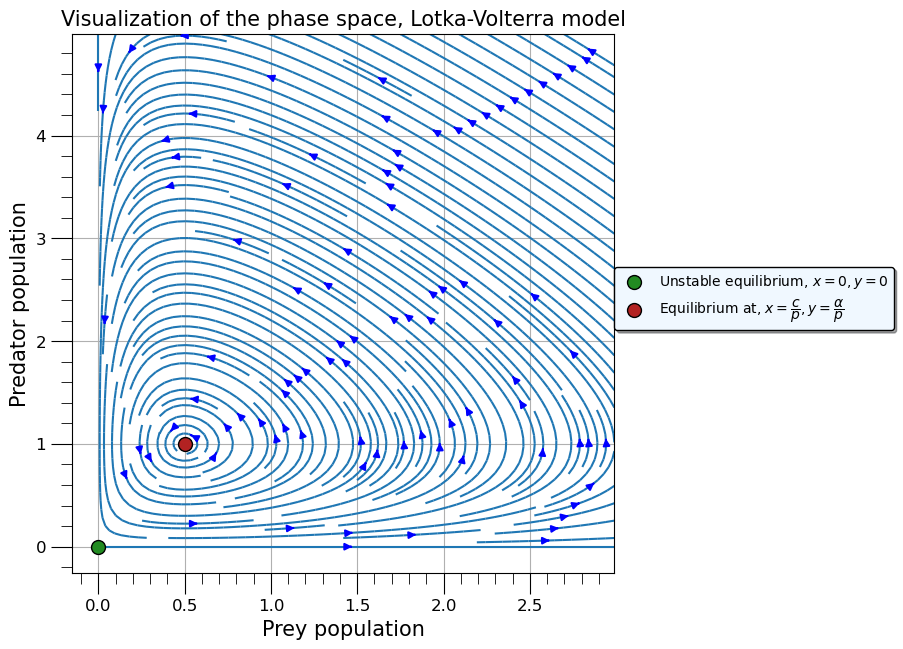

In [35]:
parameters = {'a' : 1, 'p' : 1, 'c' : 0.5}

solution_1 = (parameters['c'] / parameters['p'], parameters['a'] / parameters['p'])


X, Y = np.meshgrid(np.arange(0, 3, 0.01), np.arange(0, 5, 0.01))

U = X * (parameters['a'] - parameters['p'] * Y)
V = -Y * (parameters['c'] - parameters['p'] * X)

fig, ax = plt.subplots(1, 1, figsize=(7, 7))





ax.grid(zorder = 1)

ax.tick_params(axis='both', which='major', labelsize=12, length=15)
ax.tick_params(axis='both', which='minor', labelsize=12, length=8)

ax.minorticks_on()

ax.streamplot(X, Y, U, V, color = 'C0', zorder = 2, density = 2, arrowstyle = '-|>', linewidth = 1.5)


# iterate through the children of ax
for art in ax.get_children():
    # we are only interested in FancyArrowPatches
    if not isinstance(art, matplotlib.patches.FancyArrowPatch):
        continue
    # remove the edge, fill with black
    art.set_edgecolor(matplotlib.colors.to_rgba('blue'))
    art.set_facecolor(matplotlib.colors.to_rgba('blue'))
    
    # make it bigger
    
    # move the arrow head to the front
    art.set_zorder(10)

ax.scatter(0, 0, label = 'Unstable equilibrium, $x=0, y = 0$', color = 'forestgreen', zorder = 4, edgecolor = 'black', s = 100)
ax.scatter(solution_1[0], solution_1[1], label = 'Equilibrium at, $x=\dfrac{c}{p}, y = \dfrac{\\alpha}{p}$',\
     color = 'firebrick', zorder = 4, edgecolor = 'black', s = 100)

ax.legend(fontsize = 10,  facecolor = 'aliceblue', edgecolor = 'black', framealpha = 1, frameon = True, shadow = True, loc = (1, 0.45))

ax.set_title('Visualization of the phase space, Lotka-Volterra model', fontsize = 15)
ax.set_xlabel('Prey population', fontsize = 15)
ax.set_ylabel('Predator population', fontsize = 15)
plt.show()


We can see from the visualization of the phase space that, while the solutions passing from $x = 0$ or $y = 0$ go to infinity, the other ones perform closed trajectories around the solution $x = \dfrac{c}{\mathcal{p}}$, $y = \dfrac{\alpha}{\mathcal{p}}$.

<br/>

We also show below the oscillatory nature (plotting as a function of time) of the system for our choice of parameters $\alpha = 1$, $c = 0.5$, $\mathcal{p} = 1$ and for the initial condition $x = 1$, $y = 1$.

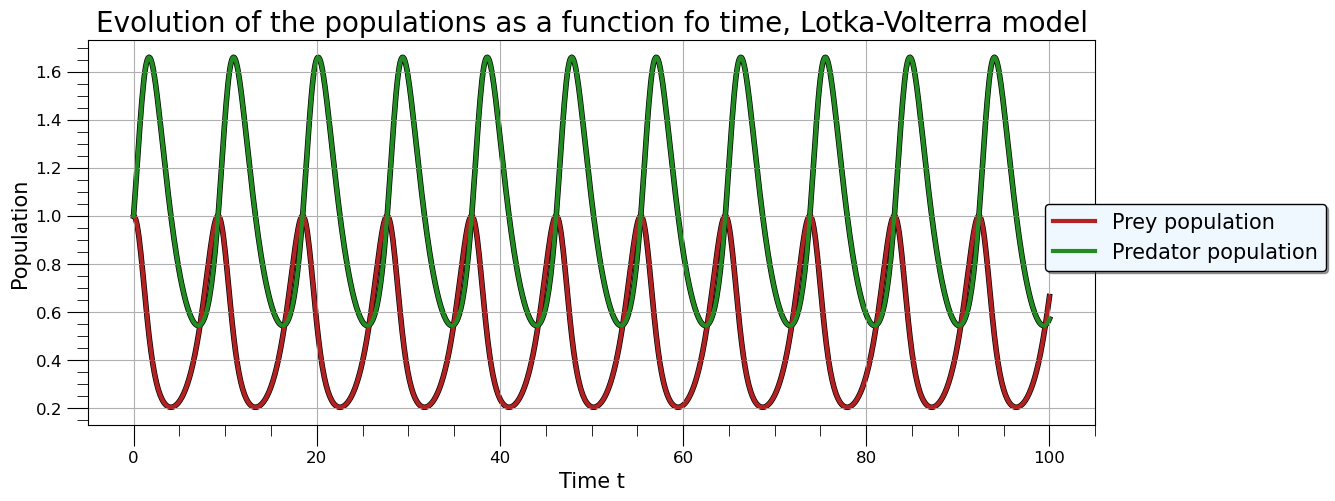

In [7]:
fig, ax = plt.subplots(1, 1, figsize = (13, 5))
solution = return_solution([1, 1], t, **parameters)
ax.plot(t, solution[:, 0], color = 'firebrick', linewidth = 3, label = 'Prey population', zorder = 2)
ax.plot(t, solution[:, 1], color = 'forestgreen', linewidth = 3, label = 'Predator population', zorder = 2)
ax.plot(t, solution[:, 0], color = 'black', linewidth = 4, zorder = 1)
ax.plot(t, solution[:, 1], color = 'black', linewidth = 4, zorder = 1)
ax.grid(zorder = 0)
ax.legend(fontsize = 15, facecolor = 'aliceblue', shadow = True, edgecolor = 'black', loc = (0.95, 0.4))
ax.set_title('Evolution of the populations as a function fo time, Lotka-Volterra model', fontsize = 20)
ax.set_xlabel('Time t', fontsize = 15)
ax.set_ylabel('Population', fontsize = 15)
ax.tick_params(axis='both', which='major', labelsize=12, length=15)
ax.tick_params(axis='both', which='minor', labelsize=12, length=8)
ax.minorticks_on()
plt.show()

## Follow up

In this brief and simple follow up we notice and interesting properties of the Lotka-Volterra equations. To do this we insert a, tipically small, linear term to the differential equations, regulated by the parameter $\epsilon$, if $\epsilon > 0$ we have an improvement of the living conditions for both the prey and the predator while if $\epsilon < 0$ we have a worsening of the living conditions. We can write the system of equations as,

<br/>

$$
\begin{cases}
\dot{x} = \alpha x - \mathcal{p} \cdot x y + \epsilon x\\
\dot{y} = \mathcal{p} \cdot x y - c y + \epsilon y\\
\end{cases}
$$

<br/>

This translates into a mapping of our parameters $\alpha \rightarrow \alpha + \epsilon$ and $c \rightarrow c - \epsilon$.<br>
From this we rewrite the equilibrium of the system as $x^* = \dfrac{c - \epsilon}{\mathcal{p}}$ and $y^* = \dfrac{\alpha + \epsilon}{\mathcal{p}}$. 

<br/>

The conclusion we can make is that, improving the conditions for both of the populations leads to solutions gravitating around an equilibrium that is more shifted towards a point with more predators and less preys and worsening the conditions leads to the opposite effect.

<br/>

This feaure of the system can explaine what happened in the U.S. more then a century ago: in 1868 an Australian parasite (Icerya purchasi) was accidentally introduced in the environment. A particular type of ladybug was then introduce to counter the insect. After an initail success of the operation the DDT discovery and its use in agricolture led to the worsening of the environmental conditions for both species. DDT then had the result of causing the opposite of what was hoped, the increase of the Icerye.

<br/>

let's visualize it graphically,

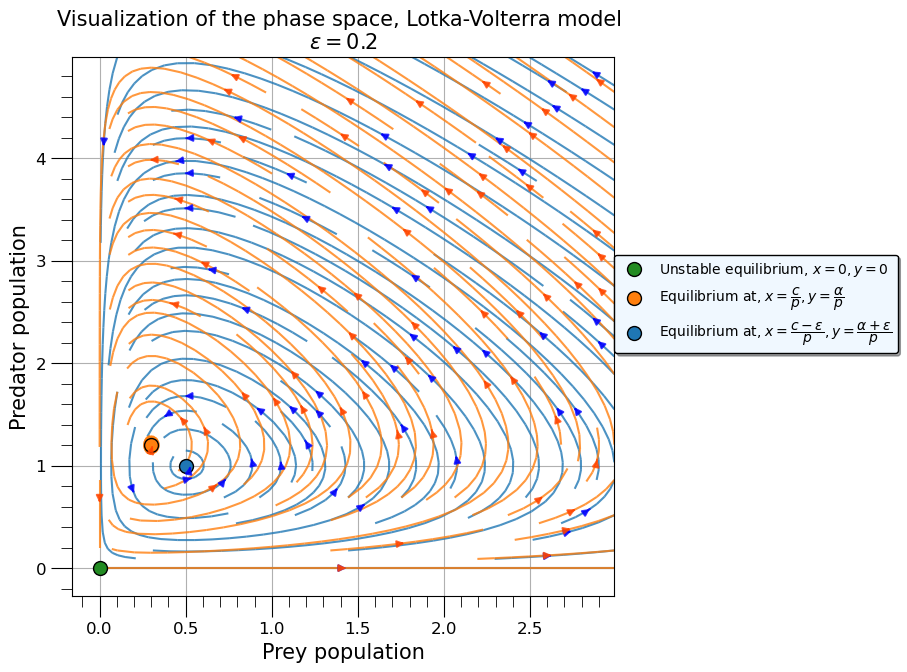

In [63]:
epsilon = 0.2

parameters_epsilon = {'a' : parameters['a'] + epsilon, 'p' : parameters['p'], 'c' : parameters['c'] - epsilon}

W = X * (parameters_epsilon['a'] - parameters_epsilon['p'] * Y)
Z = -Y * (parameters_epsilon['c'] - parameters_epsilon['p'] * X)

solution_2 = ((parameters['c'] - epsilon) / parameters['p'], (parameters['a'] + epsilon)/ parameters['p'])


fig, ax = plt.subplots(1, 1, figsize=(7, 7))





ax.grid(zorder = 1)

ax.tick_params(axis='both', which='major', labelsize=12, length=15)
ax.tick_params(axis='both', which='minor', labelsize=12, length=8)

ax.minorticks_on()

ax.streamplot(X, Y, U, V, color = list(matplotlib.colors.to_rgb('C0')) + [0.8], zorder = 2, density = 1, arrowstyle = '-|>', linewidth = 1.5)
for art in ax.get_children():
    # we are only interested in FancyArrowPatches
    if not isinstance(art, matplotlib.patches.FancyArrowPatch):
        continue
    # remove the edge, fill with black
    art.set_edgecolor(matplotlib.colors.to_rgba('blue'))
    art.set_facecolor(matplotlib.colors.to_rgba('blue'))
    
    # make it bigger
    
    # move the arrow head to the front
    art.set_zorder(10)


first_arrow_patches = list(filter(lambda x: isinstance(x, matplotlib.patches.FancyArrowPatch), ax.get_children()))
ax.streamplot(X, Y, W, Z, color = list(matplotlib.colors.to_rgb('C1')) + [0.8], zorder = 2, density = 1, arrowstyle = '-|>', linewidth = 1.5)


for art in ax.get_children():
    # we are only interested in FancyArrowPatches
    if not isinstance(art, matplotlib.patches.FancyArrowPatch):
        continue
    # remove the edge, fill with black
    art.set_edgecolor(list(matplotlib.colors.to_rgb('orangered')) + [0.8])
    art.set_facecolor(list(matplotlib.colors.to_rgb('orangered')) + [0.8])
    
    # make it bigger
    
    # move the arrow head to the front
    art.set_zorder(10)

for art in first_arrow_patches:
    # we are only interested in FancyArrowPatches
    if not isinstance(art, matplotlib.patches.FancyArrowPatch):
        continue
    # remove the edge, fill with black
    art.set_edgecolor(list(matplotlib.colors.to_rgb('blue')) + [0.8])
    art.set_facecolor(list(matplotlib.colors.to_rgb('blue')) + [0.8])
    
    # make it bigger
    
    # move the arrow head to the front
    art.set_zorder(10)





ax.scatter(0, 0, label = 'Unstable equilibrium, $x=0, y = 0$', color = 'forestgreen', zorder = 4, edgecolor = 'black', s = 100)
ax.scatter(solution_2[0], solution_2[1], label = 'Equilibrium at, $x=\dfrac{c}{p}, y = \dfrac{\\alpha}{p}$',\
     color = 'C1', zorder = 4, edgecolor = 'black', s = 100)

ax.scatter(solution_1[0], solution_1[1], label = 'Equilibrium at, $x=\dfrac{c - \\epsilon}{p}, y = \dfrac{\\alpha + \\epsilon}{p}$',\
     color = 'C0', zorder = 4, edgecolor = 'black', s = 100)

ax.legend(fontsize = 10,  facecolor = 'aliceblue', edgecolor = 'black', framealpha = 1, frameon = True, shadow = True, loc = (1, 0.45))

ax.set_title('Visualization of the phase space, Lotka-Volterra model, \n$\\epsilon = 0.2$', fontsize = 15)
ax.set_xlabel('Prey population', fontsize = 15)
ax.set_ylabel('Predator population', fontsize = 15)
plt.show()
